In [1]:
%matplotlib inline

from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('ggplot')

In [12]:
cols = ['id', 'type', 'number', 'date','location', 'country', 
        'lat', 'long', 'airport_code', 'airport_name', 'injury_severity', 
        'aircraft_damage', 'aircraft_cat', 'reg_no', 'make', 'model',
        'amateur_built', 'no_engines', 'engine_type', 'FAR_desc', 'schedule', 
        'purpose', 'air_carrier', 'fatal','serious', 'minor', 'uninjured',
        'weather', 'broad_phase', 'report_status', 'pub_date', 'none']  # causion: 'none' col is needed
aaData = pd.read_csv('aviation.csv', delimiter='|', skiprows=1, names=cols)

In [14]:
aaData.head()

,id,type,number,date,location,country,lat,long,airport_code,airport_name,...,air_carrier,fatal,serious,minor,uninjured,weather,broad_phase,report_status,pub_date,none
0,20170501X52315,Accident,GAA17CA251,04/30/2017,"Wheatland, WY",United States,42.055556,-104.928611,,N/A,...,,,,,1,VMC,,Preliminary,05/01/2017,
1,20170425X60823,Accident,CEN17FA167,04/25/2017,"Huntsville, TX",United States,30.794166,-95.538333,,N/A,...,,1,,,,VMC,,Preliminary,05/01/2017,
2,20170427X51522,Accident,GAA17CA246,04/24/2017,"Chesterfield, MO",United States,,,,,...,,,,,1,,,Preliminary,04/27/2017,
3,20170427X20409,Accident,GAA17CA244,04/24/2017,"Waukesha, WI",United States,43.041111,-88.236944,UES,WAUKESHA COUNTY,...,,,,,1,VMC,,Preliminary,04/27/2017,
4,20170424X60355,Accident,CEN17FA164,04/24/2017,"Boonville, MO",United States,38.959167,-92.681389,VER,JESSE VIERTEL MEMORIAL,...,,2,,,,VMC,APPROACH,Preliminary,04/27/2017,


In [25]:
aaData['datetime'] = [datetime.strptime(d, ' %m/%d/%Y ') for d in aaData['date']]
aaData['datetime'].head()

0   2017-04-30
1   2017-04-25
2   2017-04-24
3   2017-04-24
4   2017-04-24
Name: datetime, dtype: datetime64[ns]

In [26]:
aaData['month'] = [int(d.month) for d in aaData['datetime']]
aaData['year'] = [int(d.year) for d in aaData['datetime']]

In [27]:
def decyear(date): 
    start = datetime(year=date.year, month=1, day=1) 
    end = datetime(year=date.year+1, month=1, day=1) 
    decimal = (date - start) / (end - start) 
    return date.year + decimal

In [47]:
aaData['decyear'] = aaData['datetime'].apply(decyear)

In [30]:
cols = ['lat', 'long', 'fatal', 'serious', 'minor', 'uninjured'] 
aaData[cols] = aaData[cols].applymap( 
    lambda x: np.nan if x.isspace() else float(x))

(1948.311475409836, 2017.8260273972603)

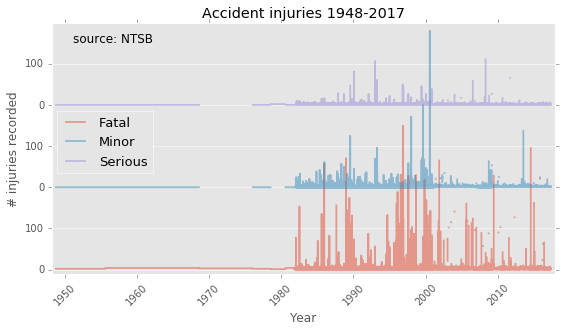

In [48]:
plt.figure(figsize=(9,4.5)) 
plt.step(aaData['decyear'], aaData['fatal'], lw=1.75, where='mid', alpha=0.5, label='Fatal') 
plt.step(aaData['decyear'], aaData['minor']+200, lw=1.75, where='mid', alpha=0.5, label='Minor') 
plt.step(aaData['decyear'], aaData['serious']+200*2, lw=1.75, where='mid', alpha=0.5, label='Serious') 
plt.xticks(rotation=45) 
plt.legend(loc=(0.01,.4),fontsize=13) 
plt.ylim((-10,600)) 
plt.grid(axis='x') 
plt.title('Accident injuries {0}-{1}'.format(aaData['year'].min(), aaData['year'].max())) 
plt.text(0.2,0.92,'source: NTSB', size=12, transform=plt.gca().transAxes, ha='right')
plt.yticks(np.arange(0,600,100), [0,100,0,100,0,100]) 
plt.xlabel('Year') 
plt.ylabel('# injuries recorded') 
plt.xlim((aaData['decyear'].min()-0.5, aaData['decyear'].max()+0.5))